Félicitations à tous les étudiants qui passent l'examen certifiant de Data Analyst avec la Wild Scode School !  
Vous avez parcouru un chemin remarquable dans votre apprentissage des compétences analytiques et votre maîtrise des techniques de traitement des données.  
Vous serez évalué sur des compétences à travers 4 cas pratiques:
- SQL, RGPD, Web Scraping et API
- Pandas
- Machine Learning
- Business Case

Vous pouvez effectuer les cas pratiques dans l'ordre que vous souhaitez. Pour vous aider dans votre organisation de travail, vous trouverez une estimation du temps pour chaque partie.  
En ce qui concerne les réponses écrites, pensez à bien soigner les explications, comme si vous répondiez à un client.

** Votre google collab qui contient toutes vos réponses à l'examen devra être déposé au plus tard (voir mail) dans le dépôt dont le lien vous a été communiqué par mail. **   

---

**Pour le cas pratique "Business Case", votre présentation se décompose sur deux supports:**
- **Slides de présentations contenant l'introduction (Présentation du contexte et problématique) et la conclusion (recommandations pour le client)**
- **Dashboard que vous utiliserez pour présenter vos graphiques et tables**  
---

**Rappel des livrables** :

**BLOC 1,2,3** :
1 fichier colab Notebook "Certification Data analyst - Cas Pratiques" avec les résultats attendus et commentés à l’écrit


**BLOC 4** :

1 Fichier Power Bi

1 Présentation (sous forme .pdf ou .ppt)


Veuillez mettre via le lien de dépôt reçu par mail, vos slides sous format .pdf, ainsi que des captures d'écrans de votre tableau de bord à l'intérieur de ce même .pdf. Il est indispensable que tous les éléments pour la présentation soient déposés dans ce dossier, dans le temps imparti.


De mercredi à vendredi, auront lieu les oraux pour chaque étudiant.
Chaque passage à l'oral se déroule de la façon suivante:

1. Questions du jury à l'étudiant, à partir du google collab qui contient les réponses aux cas pratiques SQL, RGPD, Web Scraping & API, Pandas et Machine Learning. Vous devrez partager votre écran et permettre au formateur de vous poser des questions sur le travail fourni sur votre fichier google collab.
2. Présentation du cas pratique "Business Case", d'une durée de 7 minutes, suivi d'une série de questions posées par le formateur.


Vous terminerez avec la présentation du cas pratique "Business Case", en répondant au besoin du client comme indiqué dans la partie Cas Pratique.


 Bonne chance à tous ! 🎉📊

---

# SQL, RGPD, Web Scraping & API  _(2 heures)_

## SQL

> 1. **Compétence C1.3** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. **Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.**

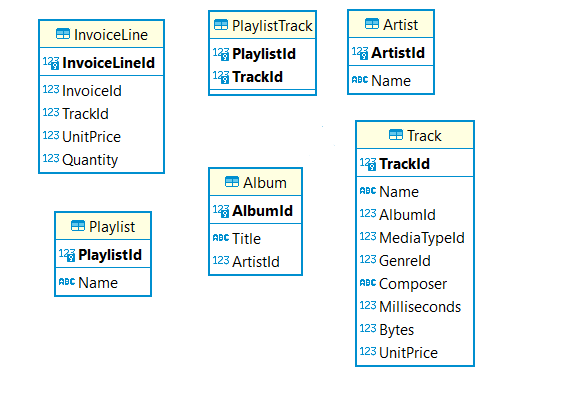

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

**Réponse :**

InvoiceLine - Track Clé Primaire : Track[TrackId] Clé étrangère : InvoiceLine[TrackId]   
Album - Artist :  Clé Primaire : Artist[ArtistId] Clé étrangère : Album[ArtistId]   
Album - Track :  Clé Primaire : Album[AlbumId] Clé étrangère : Track[AlbumId]   
Playlist - PlaylistTrack :  Clé Primaire : Playlist[PlaylistId] Clé étrangère : PlaylistTrack[PlaylistId]    
Track - PlaylistTrack :  Clé Primaire : Track[TrackId] Clé étrangère : PlaylistTrack[TrackId]

> 2. **Compétence C1.3** Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



**Réponse:**  
La table PlaylistTrack est une table intermédiaire. Elle est recommandée lorsqu'il y a des relations de types many-to-many entre 2 tables.
Par exemple ici, une playlist peut être associé à plusieurs tracks et un track peut être associé à plusieurs playlists

3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [1]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/WildCodeSchool/wilddata/blob/main/music.zip?raw=true")
open('music.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("music.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('music.sqlite')



In [2]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("select * from album", conn)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 **Compétence C1.4** Renvoyer le nom de la playlist qui contient le plus de morceaux, ainsi que le nombre de morceaux pour cette playlist.

Résultat attendu:

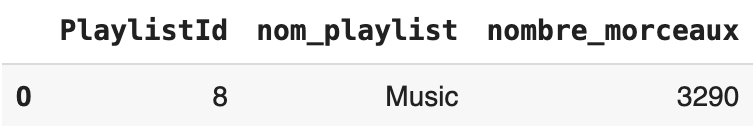

In [7]:
#playlist qui contient le plus de morceaux et le nombre de morceaux correspondant.
pd.read_sql("""
select
  PlaylistTrack.PlaylistId,
  Playlist.Name as nom_playlist,
  count(PlaylistTrack.TrackId) as nombre_morceaux
from PlaylistTrack
join Playlist on PlaylistTrack.PlaylistId = Playlist.PlaylistId
group by PlaylistTrack.PlaylistId,
        Playlist.Name
having nombre_morceaux = (
  SELECT max(nombre_morceaux)
  from (
    select
      count(PlaylistTrack.TrackId) as nombre_morceaux
    from PlaylistTrack
    group by PlaylistTrack.PlaylistId
      ) as max_nb_morceaux)
order by PlaylistTrack.PlaylistId desc

""", conn)
# il y a 2 playlists avec le même nom et le même nombre de titres

,PlaylistId,nom_playlist,nombre_morceaux
0,8,Music,3290
1,1,Music,3290


> 3.2 Renvoyer les noms d'artistes, leur nombre de morceaux et leur nombre d'albums par artiste, dans l'ordre décroissant par rapport au nombre de morceaux.

Résultat attendu:

 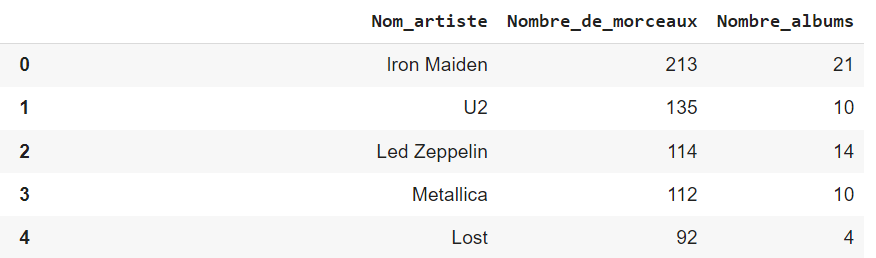

In [8]:
# Noms artists, nombre de morceaux et nombre d'albums par ordre décroissant de nombre de morceaux

pd.read_sql("""
select
  Artist.Name as Nom_artiste,
  count(Track.TrackId) as Nombre_de_morceaux,
  count(distinct Track.AlbumId) as Nombre_d_albums
from
  Artist
  join Album on Artist.ArtistId = Album.ArtistId
  join Track on Album.AlbumId = Track.AlbumId
group by
  Nom_artiste
order by
  Nombre_de_morceaux desc
""", conn)





,Nom_artiste,Nombre_de_morceaux,Nombre_d_albums
0,Iron Maiden,213,21
1,U2,135,10
2,Led Zeppelin,114,14
3,Metallica,112,10
4,Lost,92,4
...,...,...,...
199,"Academy of St. Martin in the Fields, Sir Nevil...",1,1
200,"Academy of St. Martin in the Fields, John Birc...",1,1
201,Academy of St. Martin in the Fields Chamber En...,1,1
202,Aaron Goldberg,1,1


> 3.3 **Compétence C1.1** Créer une requête qui renvoie le nombre de morceaux distinct dans la table `Track`. On souhaite renvoyer le nombre de morceaux qui ont des noms différents.

Résultat attendu:

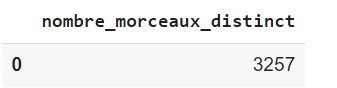

In [9]:
#Nombre de morceaux distincts dans Track ayant des noms différents
pd.read_sql("""
select
  count(distinct Name) as Nombre_morceaux_distincts
from
  Track

""", conn)


,Nombre_morceaux_distincts
0,3257


> 3.4. **Compétence C1.2** La maison de disque souhaiterai investir dans les genres qui sont les plus représentés, car ce sont les mieux vendu. Combien de morceaux contient le genre le plus représenté ?

Résultat attendu :

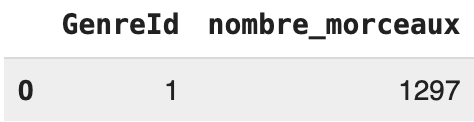

In [ ]:
#genre avec le plus de morceaux
pd.read_sql("""
select
  GenreId,
  count(TrackID) as nombre_morceaux
from
  Track
group by
  GenreId
order by
  nombre_morceaux desc
limit 1
""", conn)


,GenreId,nombre_morceaux
0,1,1297


---

## RGPD  



4: **Compétence C1.7** Que signifie RGPD, et quel est son objectif principal ?


**Réponse:**

RGPD signifie Réglement Général sur la Protection des Données. Ce règlement européen vise à renforcer et unifier la protection des données personnelles au sein de l'Union Européenne.

---

## Web Scraping



5. **Compétence C1.5** Votre collègue de bureau à qui vous avez partagé le DataFrame `df_all` souhaite récuperer un descriptif de texte pour chaque arrondissement. C'est sa mission, pas la vôtre, donc vous allez vous contenter de répondre à sa question.
Votre collègue aimerait savoir si sa requête lui a permis d'avoir du contenu en retour.
Dans un cas, le code `response` lui renvoie "<Response [200]>", et dans l'autre cas, le code `response` lui renvoie "<Response [404]>".
Il ne comprend pas, et aimerait que vous lui expliquer ce que signifie chacune des deux réponses.
Soyez le plus clair possible, et écrivez votre réponse comme vous l'auriez expliqué à l'oral.

**Réponse:**

<Response [200]> signifie que la requête a réussi, le serveur a bien reçu et traité la requête. Autrement dit, il a renvoyé une réponse « OK ». Mais, cela ne garantit pas que le contenu est celui attendu : il pourrait être vide ou contenir des données non attendues    
  
<Response [404]> signifie que la page n'a pas été trouvée. Il doit y avoir une erreur dans le lien utilisé pour faire la requête.


---


## API

Voici les données de géolocalisation d'un appartement. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [10]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

6. **Compétence C1.6** Utiliser la partie **reverse** de l'API [`https://adresse.data.gouv.fr/api-doc/adresse`](https://adresse.data.gouv.fr/api-doc/adresse) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


In [11]:
url = f"https://api-adresse.data.gouv.fr/reverse/?lon={longitude_appartement}&lat={latitude_appartement}"
response = requests.get(url)
data = response.json()
adresse = data['features'][0]['properties']['label']
adresse

'111 Rue Damrémont 75018 Paris'

---

# Pandas _(2 heures)_

Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [12]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_paris.csv")

df_transactions

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2019-1064422,156000.0,19,8210,1,appartement,Paris 3e Arrondissement,Enfants Rouges 3,75103,75,751031003,75103000AK0097,2.361791,48.861877,2019-07-03
1,2019-1080094,495000.0,53,9339,3,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BJ0016,2.283552,48.836610,2019-04-30
2,2019-1078635,430000.0,49,8775,3,appartement,Paris 15e Arrondissement,Saint-Lambert 24,75115,75,751155724,75115000BT0039,2.298475,48.841206,2019-01-17
3,2019-1069949,216000.0,30,7200,3,appartement,Paris 10e Arrondissement,Hopital Saint-Louis 3,75110,75,751104003,75110000BJ0070,2.371124,48.872010,2019-04-17
4,2019-1093709,500000.0,45,11111,2,appartement,Paris 18e Arrondissement,Grandes Carrieres 12,75118,75,751186912,75118000AV0086,2.338148,48.890540,2019-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2019-1090117,206450.0,21,9830,1,appartement,Paris 17e Arrondissement,Epinettes 7,75117,75,751176807,75117000DH0132,2.321425,48.892270,2019-10-07
286,2018-1400990,113000.0,11,10272,1,appartement,Paris 18e Arrondissement,Clignancourt 24,75118,75,751187024,75118000BE0079,2.343846,48.895130,2018-05-23
287,2018-1391042,315000.0,30,10500,2,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BK0018,2.288922,48.838097,2018-12-27
288,2018-1402082,366000.0,58,6310,4,appartement,Paris 18e Arrondissement,Chapelle 5,75118,75,751187205,75118000CZ0021,2.361734,48.893486,2018-07-26


> 7. **Compétence C2.6** Supprimer les valeurs aberrantes, qui ont une surface supérieure à 6000 et les insérer dans un DataFrame, nommé `df_outliers`. Renvoyer le nombre de lignes pour ce DataFrame.

In [14]:
#je crée un DataFrame sans les valeurs de surface > 6000
df_sans_ab = df_transactions[df_transactions['surface_reelle_bati'] <= 6000]
df_sans_ab

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2019-1064422,156000.0,19,8210,1,appartement,Paris 3e Arrondissement,Enfants Rouges 3,75103,75,751031003,75103000AK0097,2.361791,48.861877,2019-07-03
1,2019-1080094,495000.0,53,9339,3,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BJ0016,2.283552,48.836610,2019-04-30
2,2019-1078635,430000.0,49,8775,3,appartement,Paris 15e Arrondissement,Saint-Lambert 24,75115,75,751155724,75115000BT0039,2.298475,48.841206,2019-01-17
3,2019-1069949,216000.0,30,7200,3,appartement,Paris 10e Arrondissement,Hopital Saint-Louis 3,75110,75,751104003,75110000BJ0070,2.371124,48.872010,2019-04-17
4,2019-1093709,500000.0,45,11111,2,appartement,Paris 18e Arrondissement,Grandes Carrieres 12,75118,75,751186912,75118000AV0086,2.338148,48.890540,2019-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2019-1090117,206450.0,21,9830,1,appartement,Paris 17e Arrondissement,Epinettes 7,75117,75,751176807,75117000DH0132,2.321425,48.892270,2019-10-07
286,2018-1400990,113000.0,11,10272,1,appartement,Paris 18e Arrondissement,Clignancourt 24,75118,75,751187024,75118000BE0079,2.343846,48.895130,2018-05-23
287,2018-1391042,315000.0,30,10500,2,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BK0018,2.288922,48.838097,2018-12-27
288,2018-1402082,366000.0,58,6310,4,appartement,Paris 18e Arrondissement,Chapelle 5,75118,75,751187205,75118000CZ0021,2.361734,48.893486,2018-07-26


In [15]:
#je crée un DataFrame sans les valeurs de surface > 6000
df_outliers = df_transactions[df_transactions['surface_reelle_bati'] > 6000]
df_outliers

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
50,2019-1100210,42101496.0,8290,5078,0,local industriel,Paris 19e Arrondissement,Amerique 21,75119,75,751197521,75119000CY0033,2.392046,48.886800,2019-11-14
113,2019-1084676,195600000.0,11887,16454,0,local industriel,Paris 16e Arrondissement,Porte Dauphine 7,75116,75,751166307,75116000EA0013,2.279492,48.869090,2019-06-25
130,2018-1406579,15414083.0,7385,2087,0,local industriel,Paris 19e Arrondissement,Pont de Flandre 12,75119,75,751197412,75119000BD0023,2.385270,48.896828,2018-06-29
190,2018-1378678,31742400.0,7128,4453,0,local industriel,Paris 11e Arrondissement,Saint-Ambroise 9,75111,75,751114209,75111000AP0010,2.368367,48.862427,2018-06-28


> 8. **Compétence C2.6 (deuxième chance)** Vérifier le nombre de valeurs manquantes pour chaque colonne.

In [16]:
df_transactions.isna().sum()

#Pas de valeurs manquantes dans le df_transactions

,0
id_mutation,0
valeur_fonciere,0
surface_reelle_bati,0
prix_m2,0
nombre_pieces_principales,0
type_local,0
nom_commune,0
nom_iris,0
code_commune,0
code_departement,0


> 9. **Compétence C2.5** Observer le nombre de valeurs distinctes pour la colonne "type_local" pour `df_transactions`.

In [17]:
df_transactions['type_local'].value_counts()
#mon df_transactions contient toujours les valeurs aberrantes qui correspondent au type local industriel.

,count
type_local,
appartement,286
local industriel,4


> 10. **Compétence C2.5** Quelle est la moyenne de la "surface_reelle_bati" pour chaque valeur de la variable "type_local"?

In [18]:
df_transactions.groupby('type_local')['surface_reelle_bati'].mean()

,surface_reelle_bati
type_local,
appartement,47.356643
local industriel,8672.500000


---

## Regex

> 11. **Compétence C2.7, Compétence C2.3** Utiliser la librairie `re` (Regular Expression) pour extraire le code postal de l'adresse ci-dessous, à l'aide d'une fonction que vous allez créer:

In [19]:
adresse = "8 Passage Petit Cerf 75017 Paris"


In [20]:
import re
def extract_code (adresse) :
  motif = re.compile(r"\d{5}")
  recherche = motif.findall(adresse)
  return recherche[0]



In [21]:
extract_code (adresse)

'75017'

## Méthode Agile SCRUM



> 12. **Compétence C2.2** Dans le cadre de l'utilisation de la méthode agile SCRUM, quelle est la différence entre le scrum master et le product owner ?

**Réponse :**

Le Product Owner définit et priorise les fonctionnalités du produit à développer.  
Le Scrum Master aide l'équipe à appliquer Scrum correctement et à lever les obstacles.

---

## Sélection de données

Voici un nouveau Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.



In [24]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions.head(1)

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.8723,2018-01-02


> 13.**Compétence C2.1** Créer un nouveau DataFrame `df_flats` qui ne regroupe que les appartements. Combien de lignes contient `df_flats` ?

In [25]:
#df_flats ne doit contenir que les lignes de df_transactions concernant des appartements
df_flats = df_transactions[df_transactions['type_local']=='appartement']
len(df_flats)

48921

df_flats contient 48921 lignes

# Machine Learning _(4 heures)_

## Sélection de données et NLP *(30 minutes)*

Dans ce cas pratique Machine Learning,  notre objectif sera de créer un algorithme capable de prédire le prix d'appartements, pour la ville de Paris. Vous utiliserez donc le DataFrame `df_flats`.

> 13. Ne garder que les colonnes [`valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`, `code_commune`] pour le DataFrame `df_flats`.

In [26]:
df = df_flats[['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'code_commune']]
df.head()

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,code_commune
0,280000.0,25,2,75120
1,110000.0,12,1,75114
2,87950.0,9,1,75111
3,699000.0,111,6,75113
4,251000.0,29,2,75112


> **Compétence C3.5** 14. On aimerait enrichir notre jeu de données avec une variable qui contient du texte pour chaque ligne. Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données. En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données `df_flats`.  Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ? Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?



**Réponse**

Il serait intéressant d'avoir une variable Etat qui préciserait l'état de l'appartement et permettrait de savoir si des travaux sont à prévoir Par exemple : Récemment rénové, Habitable en l'état mais raffraichissement à prévoir, Travaux nécessaires...   
Pour l'exploiter, je ferai mettrai en place un text mining suivi d'une analyse de sentiments via un bags of words ou un TF-IDF pour rendre les données exploitables par un machine learning.
Pour le machine learning:
- soit j'attribuerai des classes à certaines données pour pouvoir entrainer un modèle supervisé de type classification comme un arbre de décision et l'appliquer au reste des données. Les classes attribuées pourront être utilisée après encodage dans un machine learning de type régression pour prédire le prix.   
- soit je ferai un clustering pour séparer mes données en cluster et j'analyserai ensuite chaque cluster pour connaître le sentiment qui s'en dégage et lui attribuer un label. Je ferai ensuite un machine learning de type régression pour prédire le prix.   
   
La variable Etat aurait ainsi un impact sur les performances du modèle. Cela pourrait les augmenter car le modèle aurait plus de variables sur lesquelles s'entrainer.

### Partie Machine Learning - Regression _(1 heure 45 minutes)_

> 14. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix d'appartements.
`X` est composé des variables `surface_reelle_bati`, `nombre_pieces_principales` et `code_commune`.
`y` est la variable `valeur_fonciere`.


In [30]:
X = df[['surface_reelle_bati', 'nombre_pieces_principales', 'code_commune']]
y = df['valeur_fonciere']

> 15. La colonne `code_commune` contient des codes, représentant les arrondissements, ce qui signifie que ce sont des valeurs discrètes. Il est donc nécessaire de créer autant de colonnes qu'il y a de valeurs distinctes pour cette colonne. Aussi, il faudra supprimer la colonne `code_commune` pour ne garder que les colonnes qui ont été générées à partir de cette dernière.

In [31]:
X_num = X[['surface_reelle_bati', 'nombre_pieces_principales']]
X_cat = X['code_commune']

X_cat_dum = pd.get_dummies(X_cat)

X = pd.concat([X_num, X_cat_dum], axis=1)
X

,surface_reelle_bati,nombre_pieces_principales,75101,75102,75103,75104,75105,75106,75107,75108,...,75111,75112,75113,75114,75115,75116,75117,75118,75119,75120
0,25,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,12,1,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,9,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,111,6,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,29,2,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53180,18,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53181,27,1,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53182,28,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53183,28,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


> 16. **Compétence C3.2** Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


> 17. Importer le modèle `Linear Regression` de la librairie `sklearn`

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

> 18. **Compétence C3.3** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [34]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
model.fit(X_train, y_train)
print(f"Score d'entrainement {model.score(X_train, y_train)}")
print(f"Score de test {model.score(X_test, y_test)}")

Score d'entrainement 0.8479844132294845
Score de test 0.8500053934600471


**Réponse:**

Les 2 scores sont assez élevés et proches. Le modèle est robuste et performant. Il n'y a pas de surentrainement du modèle.   
La métrique utilisée est le R2.

> 19. **Compétence C3.7** Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

**Réponse :**

L'algorithme de régression linéaire permet de prédire une donnée cible (y ici la valeur foncière) en fonction de variables explicatives (x ici surface_reelle_bati, nombre_pieces_principales et code_commune ). Il cherche à établir une relation linéaire de type y = aX + b  entre les variables.   
Dans notre cas : y=a1×surface_reelle_bati + a2×nombre_pieces_principales+ a3×code_commune + b.   

L'algorithme "apprend" à partir des données d'entrainement en ajustant les coefficients a1, a2, a3 et b de manière à minimiser l'erreur entre les valeurs prédites et les valeurs réelles. C'est ce qu'on appelle l'entraînement du modèle.

Une fois entraîné, l'algorithme peut prédire la valeur foncière pour de nouvelles données en utilisant l'équation linéaire trouvée.


> 20. **Compétence C3.1** Afficher la matrice de corrélation pour `df_flats`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est à dire "valeur foncière" ?

**Réponse :**


In [35]:
df_flats.select_dtypes('number').corr()

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,code_commune,code_departement,code_iris,longitude,latitude
valeur_fonciere,1.000000,0.908142,0.414604,0.750153,-0.166078,NaN,-0.166169,-0.215351,-0.022591
surface_reelle_bati,0.908142,1.000000,0.108624,0.840113,-0.062434,NaN,-0.062560,-0.193245,-0.009064
prix_m2,0.414604,0.108624,1.000000,0.094695,-0.356543,NaN,-0.356516,-0.174681,-0.064426
nombre_pieces_principales,0.750153,0.840113,0.094695,1.000000,-0.023447,NaN,-0.023602,-0.131824,0.012424
code_commune,-0.166078,-0.062434,-0.356543,-0.023447,1.000000,NaN,0.999868,-0.056110,0.281370
code_departement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
code_iris,-0.166169,-0.062560,-0.356516,-0.023602,0.999868,NaN,1.000000,-0.055961,0.281249
longitude,-0.215351,-0.193245,-0.174681,-0.131824,-0.056110,NaN,-0.055961,1.000000,0.128689
latitude,-0.022591,-0.009064,-0.064426,0.012424,0.281370,NaN,0.281249,0.128689,1.000000


La surface réelle batie et le nombre de pièces ont la corrélation la plus élevée avec la valeur foncière

### Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [53]:
df_ml_idf = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_idf_no_paris.csv")
df_ml_idf.head(1)

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local
0,282000.0,101,4,maison


> 21. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si un logement est une maison ou un appartement.
`X` est composé des `valeur_fonciere`, `surface_reelle_bati` et`nombre_pieces_principales`.
`y` est la variable `type_local`.

In [54]:
X = df_ml_idf[['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales']]
y = df_ml_idf['type_local']

> 22. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

> 23. Importer le modèle `DecisionTreeClassifier` ou `KNeighborsClassifier` de la librairie sklearn.

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

> 24. **Compétence C3.4** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [58]:
model.fit(X_train, y_train)


print(f"Score {model.score(X_test, y_test)}")


Score 0.7822089976462229


**Réponse :**

Le score obtenu est l'accuracy. Elle mesure le pourcentage total de prédictions correctes. Dans notre cas, 78 % des valeurs prédites sont correctes.

> 25. **Compétence C3.6** On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

**Réponse :**   
Les performances peuvent dépendre de la répartition des données entre les jeux  d'entrainement et de test. Une validation croisée peut permettre une estimation plus robuste.   

Si les données de test ne représent pas bien l'ensemble des données réelles et ressemblent trop aux données d'entrainement, le modèle pourrait avoir du mal à généraliser à de nouvelles données.   
  
Si les classes sont déséquilibrées dans les données d'entraînement et de test, le modèle peut être biaisé en faveur des classes majoritaires, ce qui peut affecter ses performances sur les classes minoritaires.   
  
Les nouvelles données pourraient contenir des catégories non présentes dans le jeu de test et d'entrainement.


> 26. Afficher la matrice de confusion (`confusion matrix`) et la commenter. Expliquer les métriques `precision` et `recall`.

**Réponse :**


In [59]:
y_pred = model.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,appartement,maison
Classe réelle,,
appartement,8024,2203
maison,2701,9589


La précision mesure la proportion des prédictions positives qui le sont réellement.  
TP / (TP +FP)   
pour appartement : 8024 /(8024 + 2701) = 0.75    
pour maison : 9589 /(9589 + 2203) = 0.81   

Le recall mesure la proportion de vraies observations positives qui ont été correctement prédites
TP /(TP + FN)   
pour appartement : 8024 / (8024 + 2203) = 0.78
pour maison : 9589 / (9589 + 2701) = 0.78


# Étude de marché - Vin _(8 heures)_

Le client, le Domaine des Croix, cherche à se lancer sur le marché américain . Il souhaite donc **définir le prix** de ses bouteilles de vin **pour être compétitif sur le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix moyen en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que vous conseillez de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.




## Jeux de données
- Dataset des 130k vins : https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip
- Dataset de la bouteille de vin que le client aimerait proposer sur le marché américain : https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv


## Livrables attendus
**Compétence C4.6, Compétence C4.1** Le client souhaite une présentation (et non pas du code)
La présentation contiendra a minima ces éléments :
- Rappel du contexte et de la problématique
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés  **Compétence C2.2**
- Présentation de la partie technique et du code créé, si code il y a, pour cette analyse
- Votre tableau de bord contient des graphiques. **Compétence C4.2**
- Votre tableau de bord contient au moins une visualisation de données interactive. **Compétence C4.3**
- Votre tableau de bord contient au moins une carte représentant des informations géographiques. **Compétence C4.4**
- Votre tableau de bord contient au moins un tableau croisé. **Compétence C4.5**
- L'ensemble des graphiques et visuels doivent être lisible par tous (prise en compte des personne en situation de handicap visuel). **Compétence C4.7**
- Réponse à la question métier : proposition de prix ou de fourchette de prix au client pour être correctement positionné face à la concurrence sur le marché américain

Effectuez tout d'abord la trame ci-dessous. Puis, si vous avez des bonnes idées à proposer au client, elles sont évidemment les bienvenues.



## Préparation des données et exploration des données

## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Vous allez donc réaliser un ensemble de dataviz, avec l'outil de votre choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Vous pouvez par exemple intégrer dans votre tableau de bord:
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...



## Analyse comparative

L'objectif ici sera de comparer chacun des vins du client par rapport à ses concurrents sur le marché. Par exemple, comparer les tarifs pratiqués pour les vins français, puis de plus en plus précisément, les vins de Bourgogne puisque notre client est en Bourgogne, puis les Pinot Noir bourguignons de la même année.
N'hésitez pas à être original dans la présentation et les dataviz utilisées.

## Proposition de valeur

Avec le tableau de bord que vous lui avez fourni, le client a une idée précise de ses concurrents. Faites lui une proposition de prix en fonction de sa volonté de positionnement (par exemple : "si vous souhaitez vous positionner sur le haut de gamme, les 25% les plus chers de vos concurrents sont à ce tarif, nous vous conseillons donc de vous aligner sur ce prix").

## Qualité esthétique du tableau de bord

Essayez de garder un oeil critique et visuel sur votre tableau de bord. La forme compte autant que le fond pour le client qui n'est pas data analyst. Pensez donc à "vendre" votre analyse. Par exemple, avec des couleurs s'inspirant du milieu vinicole, des dataviz originales, etc...

## C'est à vous de jouer:

In [2]:
import pandas as pd

In [ ]:
link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df = pd.read_csv(link)

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [ ]:
df.describe()

,points,price
count,129957.000000,120964.000000
mean,88.446655,36.390827
std,3.039481,32.802430
min,80.000000,2.000000
25%,86.000000,21.000000
50%,88.000000,29.000000
75%,91.000000,42.000000
max,100.000000,1902.000000


# 1 : Préparation des données des vins dans le monde

In [ ]:
#je crée une copie du dataframe
data = df.copy()

In [ ]:
data.isna().sum()

,0
country,63
description,0
designation,37460
points,0
price,8993
province,63
region_1,21247
region_2,79446
taster_name,26244
taster_twitter_handle,31213


In [ ]:
#Supression des lignes où le prix ou le pays ou le cépage est manquant
data = data.dropna(subset=['price','country','variety'])
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 120904 entries, 1 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                120904 non-null  object 
 1   description            120904 non-null  object 
 2   designation            86141 non-null   object 
 3   points                 120904 non-null  int64  
 4   price                  120904 non-null  float64
 5   province               120904 non-null  object 
 6   region_1               101389 non-null  object 
 7   region_2               50292 non-null   object 
 8   taster_name            96409 non-null   object 
 9   taster_twitter_handle  91489 non-null   object 
 10  title                  120904 non-null  object 
 11  variety                120904 non-null  object 
 12  winery                 120904 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [ ]:
#je remplis les valeurs vides de nom d'oenologue par inconnu
data['taster_name'] = data['taster_name'].fillna('Inconnu')

#je remplis les valeurs vides de province par inconnu
data['province'] = data['province'].fillna('Inconnu')

#je remplis les valeurs vides de region_1 par inconnu
data['region_1'] = data['region_1'].fillna('Inconnu')

#je remplis les valeurs vides de region_2 par inconnu
data['region_2'] = data['region_2'].fillna('Inconnu')

<ipython-input-268-9520efd64415>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['taster_name'] = data['taster_name'].fillna('Inconnu')
<ipython-input-268-9520efd64415>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['province'] = data['province'].fillna('Inconnu')
<ipython-input-268-9520efd64415>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [ ]:
data.isna().sum()

,0
country,0
description,0
designation,34763
points,0
price,0
province,0
region_1,0
region_2,0
taster_name,0
taster_twitter_handle,29415


In [ ]:
#supression des valeurs aberrantes

data_sans_ab = data.copy()
for col in data_sans_ab.select_dtypes('number').columns:
  Q1 =data_sans_ab[col].quantile(0.25)
  Q3 =data_sans_ab[col].quantile(0.75)
  IQR = Q3 -Q1
  valeurs_ab_col =data_sans_ab[(data_sans_ab[col] <(Q1-1.5*IQR)) | (data_sans_ab[col] > (Q3+1.5*(IQR)))]
  data_sans_ab =data_sans_ab.drop(valeurs_ab_col.index, axis=0)
  print(col)
  print(valeurs_ab_col.shape)
  print(data_sans_ab.shape)

points
(47, 13)
(120857, 13)
price
(7503, 13)
(113354, 13)


In [ ]:
#suppression des doublons
data_sans_doublons = data_sans_ab.drop_duplicates()
data_sans_doublons.shape

(104293, 13)

In [5]:
#creation d'une colonne millésime

import re

def millesime(text):
  motif = re.compile(r"[1-2][0-9]{3}") #année entre 1000 et 2999
  recherche = motif.findall(text)
  if recherche :
    if len(recherche) == 1:
      recherche = recherche[0]
      return int(recherche)
    elif len(recherche) == 0 :
      return None
    else:
      recherche_sort = sorted(recherche)
      if int(recherche_sort[-1]) <= 2025:
        return int(recherche_sort[-1])
      else :
         return int(recherche_sort[-2])

In [ ]:
data_sans_doublons['millesime'] = data_sans_doublons['title'].apply(lambda x: millesime(x))

data_sans_doublons.head()

<ipython-input-273-491ec4b9b473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sans_doublons['millesime'] = data_sans_doublons['title'].apply(lambda x: millesime(x))


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,Inconnu,Inconnu,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2017.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2019.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,Inconnu,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2019.0
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018.0
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,Inconnu,Michael Schachner,@wineschach,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2017.0


In [ ]:
sorted(data_sans_doublons['millesime'].unique())

[1609.0,
 1823.0,
 1829.0,
 1849.0,
 1874.0,
 1884.0,
 1889.0,
 1921.0,
 1929.0,
 1991.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0,
 nan,
 2023.0]

In [ ]:
data_sans_doublons['millesime'].isna().sum()

2939

In [ ]:
data_fin = data_sans_doublons.dropna(subset=['millesime'])
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101354 entries, 1 to 129956
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                101354 non-null  object 
 1   description            101354 non-null  object 
 2   designation            70756 non-null   object 
 3   points                 101354 non-null  int64  
 4   price                  101354 non-null  float64
 5   province               101354 non-null  object 
 6   region_1               101354 non-null  object 
 7   region_2               101354 non-null  object 
 8   taster_name            101354 non-null  object 
 9   taster_twitter_handle  77152 non-null   object 
 10  title                  101354 non-null  object 
 11  variety                101354 non-null  object 
 12  winery                 101354 non-null  object 
 13  millesime              101354 non-null  float64
dtypes: float64(2), int64(1), object(11)
memor

In [ ]:
data_fin['millesime']= data_fin['millesime'].astype(int)

<ipython-input-277-4f82f3249066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fin['millesime']= data_fin['millesime'].astype(int)


In [ ]:
#nombre de valeurs uniques pour chauqe colonne
for col in data_fin.columns:
  print(f"{col} : {data_fin[col].nunique()}")

country : 42
description : 101329
designation : 32021
points : 19
price : 72
province : 412
region_1 : 1159
region_2 : 18
taster_name : 20
taster_twitter_handle : 15
title : 101022
variety : 675
winery : 15093
millesime : 39


In [ ]:
data_fin.to_csv('data_wine.csv', sep=";", index=False)

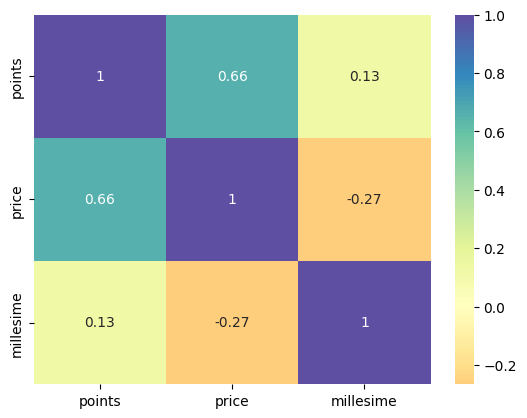

In [ ]:
corr = data_fin.select_dtypes('number').corr()

import seaborn as sns
sns.heatmap(corr, cmap='Spectral',center=0, annot=True);

#il y a une correlation entre note et prix

# 2 : Préparation du fichier des vins du domaine des croix

In [3]:
#import des données sur les vins du domaine des croix
croix = pd.read_csv('https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv')

croix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1 non-null      object 
 1   description            1 non-null      object 
 2   designation            0 non-null      float64
 3   points                 1 non-null      int64  
 4   price                  0 non-null      float64
 5   province               1 non-null      object 
 6   region_1               1 non-null      object 
 7   region_2               0 non-null      float64
 8   taster_name            1 non-null      object 
 9   taster_twitter_handle  1 non-null      object 
 10  title                  1 non-null      object 
 11  variety                1 non-null      object 
 12  winery                 1 non-null      object 
dtypes: float64(3), int64(1), object(9)
memory usage: 236.0+ bytes


In [6]:
croix['millesime']= croix['title'].apply(lambda x: millesime(x))
croix

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix,2016


In [8]:
liste_variete_croix = croix['variety'].unique().tolist()
liste_variete_croix

['Pinot Noir']

In [9]:
liste_province_croix = croix['province'].unique().tolist()
liste_province_croix

['Burgundy']

In [10]:
liste_taster_name_croix = croix['taster_name'].unique().tolist()
liste_taster_name_croix

['Roger Voss']

In [11]:
liste_region_croix = croix['region_1'].unique().tolist()
liste_region_croix

['Corton Grèves']

#3 : Machine learning Prédiction prix

Régression linéaire : permet de prédire une valeur numérique à partir d'un ensemble de caractéristiques

In [ ]:
# pour limiter le nombre de colonnes je filtre les données monde afin de ne conserver que celle qui ont le pays, la province en commun avec le vin du domaine des croix
data_ML = data_fin[(data_fin['country'] == 'France')& (data_fin['province'].isin(liste_province_croix))]
data_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2268 entries, 65 to 129811
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2268 non-null   object 
 1   description            2268 non-null   object 
 2   designation            1570 non-null   object 
 3   points                 2268 non-null   int64  
 4   price                  2268 non-null   float64
 5   province               2268 non-null   object 
 6   region_1               2268 non-null   object 
 7   region_2               2268 non-null   object 
 8   taster_name            2268 non-null   object 
 9   taster_twitter_handle  2258 non-null   object 
 10  title                  2268 non-null   object 
 11  variety                2268 non-null   object 
 12  winery                 2268 non-null   object 
 13  millesime              2268 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 265.8+ K

In [ ]:
X = data_ML[['points', 'variety','millesime','region_1']]
y = data_ML['price']

In [ ]:
X['millesime'] = X['millesime'].astype(str)

<ipython-input-289-b46faf58e778>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['millesime'] = X['millesime'].astype(str)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [ ]:
X_train_num = X_train[['points']]
X_train_cat = X_train[['variety','millesime','region_1']]

X_test_num = X_test[['points']]
X_test_cat = X_test[['variety','millesime','region_1']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_num)
X_test_standardized = scaler.transform(X_test_num)

X_train_standardized = pd.DataFrame(X_train_standardized, columns=X_train_num.columns, index=X_train_num.index)
X_test_standardized = pd.DataFrame(X_test_standardized, columns=X_test_num.columns, index=X_test_num.index)

In [ ]:
X_train_cat_dummies = pd.get_dummies(X_train_cat)
X_test_cat_dummies = pd.get_dummies(X_test_cat)

In [ ]:
X_train_encoded = pd.concat([X_train_standardized, X_train_cat_dummies], axis=1)
X_test_encoded = pd.concat([X_test_standardized, X_test_cat_dummies], axis=1)

In [ ]:
for col in X_train_encoded.columns:
  if col not in X_test_encoded.columns:
    X_test_encoded[col] = False

In [ ]:
for col in X_test_encoded.columns:
  if col not in X_train_encoded.columns:
    X_train_encoded[col] = False

In [ ]:
#préparation des donnees croix pour prédiction
X_croix = croix[['points', 'variety','millesime','region_1']]
X_croix['millesime'] = X_croix['millesime'].astype(str)
X_num_croix = X_croix[['points']]
X_cat_croix = X_croix[['variety','millesime','region_1']]
# Attention, on utilise que transform et non fit_transform car le modèle de normalisation/standardisation est déjà entrainé.
X_num_standardized_croix  = pd.DataFrame(scaler.transform(X_num_croix), columns=X_num_croix.columns)

X_cat_dummies_croix  = pd.get_dummies(X_cat_croix)
X_encoded_predire = pd.concat([X_num_standardized_croix, X_cat_dummies_croix], axis=1)

<ipython-input-297-bfa90b31217f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_croix['millesime'] = X_croix['millesime'].astype(str)


In [ ]:
for col in X_encoded_predire.columns :
  if col not in X_train_encoded.columns:
    X_train_encoded[col] = False
  if col not in X_test_encoded.columns:
    X_test_encoded[col] = False

In [ ]:
liste_col_ajout_pred =[]
for col in X_test_encoded.columns :
  if col not in X_encoded_predire.columns:
    liste_col_ajout_pred.append(col)

In [ ]:
# Créez un DataFrame avec les nouvelles colonnes
new_columns = pd.DataFrame(False, index=X_encoded_predire.index, columns=liste_col_ajout_pred)

# Ajoutez les nouvelles colonnes
X_encoded_predire = pd.concat([X_encoded_predire, new_columns], axis=1)

In [ ]:
X_train_encoded.columns

Index(['points', 'variety_Aligoté', 'variety_Auxerrois',
       'variety_Champagne Blend', 'variety_Chardonnay',
       'variety_Colombard-Ugni Blanc', 'variety_Gamay', 'variety_Pinot Noir',
       'variety_Pinot Noir-Gamay', 'variety_Rosé',
       ...
       'region_1_Viré-Clessé', 'region_1_Volnay', 'region_1_Vosne-Romanée',
       'variety_Chardonnay-Pinot Gris', 'variety_Pinot Blanc',
       'variety_Red Blend', 'region_1_Clos de la Roche',
       'region_1_Mâcon-Péronne', 'region_1_Vougeot', 'region_1_Corton Grèves'],
      dtype='object', length=118)

In [ ]:
X_test_encoded.columns

Index(['points', 'variety_Aligoté', 'variety_Champagne Blend',
       'variety_Chardonnay', 'variety_Chardonnay-Pinot Gris', 'variety_Gamay',
       'variety_Pinot Blanc', 'variety_Pinot Noir', 'variety_Pinot Noir-Gamay',
       'variety_Red Blend',
       ...
       'region_1_Côte de Beaune', 'region_1_Côtes de Nuits Villages',
       'region_1_Echézeaux', 'region_1_Monthélie', 'region_1_Mâcon Solutré',
       'region_1_Mâcon-Loché', 'region_1_Mâcon-Pierreclos',
       'region_1_Mâcon-Vergisson', 'region_1_St.-Romain',
       'region_1_Corton Grèves'],
      dtype='object', length=118)

In [ ]:
X_encoded_predire.columns

Index(['points', 'variety_Pinot Noir', 'millesime_2016',
       'region_1_Corton Grèves', 'variety_Aligoté', 'variety_Champagne Blend',
       'variety_Chardonnay', 'variety_Chardonnay-Pinot Gris', 'variety_Gamay',
       'variety_Pinot Blanc',
       ...
       'region_1_Corton-Pougets', 'region_1_Côte de Beaune',
       'region_1_Côtes de Nuits Villages', 'region_1_Echézeaux',
       'region_1_Monthélie', 'region_1_Mâcon Solutré', 'region_1_Mâcon-Loché',
       'region_1_Mâcon-Pierreclos', 'region_1_Mâcon-Vergisson',
       'region_1_St.-Romain'],
      dtype='object', length=118)

In [ ]:
colonnes = X_train_encoded.columns

In [ ]:
X_train_encoded_order = X_train_encoded[colonnes]
X_test_encoded_order = X_test_encoded[colonnes]
X_encoded_predire_order = X_encoded_predire[colonnes]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train_encoded_order, y_train)

LinearRegression()

In [ ]:
print(f"Score d'entrainement {model.score(X_train_encoded_order, y_train)}")
print(f"Score de test {model.score(X_test_encoded_order, y_test)}")

Score d'entrainement 0.845285710975433
Score de test 0.8245771785968317


In [ ]:
#prédiction des prix pour les vins du domaine croix
croix['prediction'] = model.predict(X_encoded_predire_order)

In [ ]:
croix

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime,prediction
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix,2016,54.33798


In [ ]:
croix.to_csv('croix_prediction.csv', sep=";", index=False)